In [1]:
import numpy as np
import h5py
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

Using TensorFlow backend.


In [73]:
hidden_layers = 3

In [203]:
model = Sequential()
model.add(Dense(512, input_dim=215, activation='relu'))
#model.add(Dropout(0.1))
for i in range(0,hidden_layers):
    model.add(Dense(512, activation='relu'))
#    model.add(Dropout(0.1))
model.add(Dense(1))

model.summary()        

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_95 (Dense)                 (None, 512)           110592      dense_input_20[0][0]             
____________________________________________________________________________________________________
dense_96 (Dense)                 (None, 512)           262656      dense_95[0][0]                   
____________________________________________________________________________________________________
dense_97 (Dense)                 (None, 512)           262656      dense_96[0][0]                   
____________________________________________________________________________________________________
dense_98 (Dense)                 (None, 512)           262656      dense_97[0][0]                   
___________________________________________________________________________________________

In [204]:
model.compile(optimizer=SGD(lr=0.008), loss='mse', metrics=['accuracy'])

In [205]:
data = []
with h5py.File('train-standardized.h5','r') as hf:
    data = np.array(hf.get('dataset'))
data2 = []
for d in data:
    if d[215:216] > 1:
        data2.append(d)
data = np.array(data2)
input_data = data[:,0:215]
print(input_data.shape)
target_data = data[:,215:216]
print(target_data.shape)
target_max = target_data.max()
target_min = target_data.min()
print(target_max)
print(target_min)
target_data = (target_data-target_min)/(target_max-target_min)


(11089, 215)
(11089, 1)
147.248894143
79.2798533666


In [233]:
data_validation = []
with h5py.File('validation.h5','r') as hf:
    data_validation = np.array(hf.get('dataset'))
data_validation2 = []
for d in data_validation:
    if d[215:216] > 1:
        data_validation2.append(d)
data_validation = np.array(data_validation2)
input_validation = data_validation[:,0:215]
print(input_validation.shape)
target_validation = data_validation[:,215:216]
target_validation = (target_validation-target_min)/(target_max-target_min)
print(target_validation.shape)

(635, 215)
(635, 1)


In [228]:
model.fit(input_data, target_data, nb_epoch=60, batch_size=256,shuffle=True, validation_data=(input_validation, target_validation))

Train on 11089 samples, validate on 635 samples
Epoch 1/60
11089/11089 [==============================] - 2s - loss: 0.0120 - acc: 1.8036e-04 - val_loss: 1.8318 - val_acc: 0.0000e+00
Epoch 2/60
11089/11089 [==============================] - 2s - loss: 0.0120 - acc: 1.8036e-04 - val_loss: 1.8376 - val_acc: 0.0000e+00
Epoch 3/60
11089/11089 [==============================] - 2s - loss: 0.0120 - acc: 1.8036e-04 - val_loss: 1.7205 - val_acc: 0.0000e+00
Epoch 4/60
11089/11089 [==============================] - 2s - loss: 0.0119 - acc: 1.8036e-04 - val_loss: 1.7791 - val_acc: 0.0000e+00
Epoch 5/60
11089/11089 [==============================] - 2s - loss: 0.0119 - acc: 1.8036e-04 - val_loss: 1.7730 - val_acc: 0.0000e+00
Epoch 6/60
11089/11089 [==============================] - 2s - loss: 0.0119 - acc: 1.8036e-04 - val_loss: 1.7727 - val_acc: 0.0000e+00
Epoch 7/60
11089/11089 [==============================] - 2s - loss: 0.0119 - acc: 1.8036e-04 - val_loss: 1.7389 - val_acc: 0.0000e+00
Epoch 8

(9025, 215)
(9025, 1)


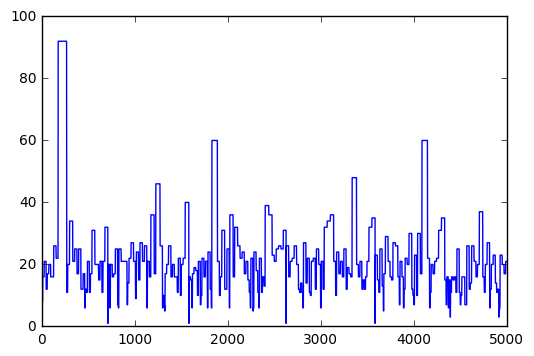

In [245]:
data_test = []
with h5py.File('test.h5','r') as hf:
    data_test = np.array(hf.get('dataset'))
input_test = data_test[:,0:215]
print(input_test.shape)
target_test = data_test[:,242:243]
print(target_test.shape)
target_test = np.array(target_test).reshape(len(target_test))
plot(target_test[0:5000])

In [119]:
%pylab inline

import matplotlib

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [234]:
output_test = []
for test in input_validation[0:2000]:
    test = np.array(test)
    test = test.reshape(1,215)
    output_test.append(model.predict(test))

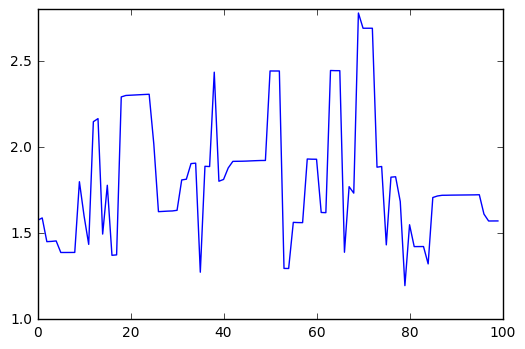

In [235]:
output_test = np.array(output_test[0:100])
output_test = output_test.reshape(len(output_test))

plot(output_test)

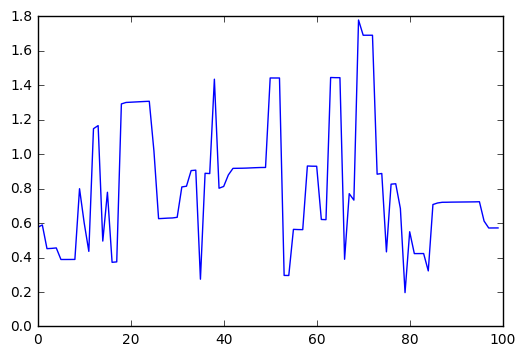

In [237]:

output_test = np.array(output_test[0:100]-1)
output_test = output_test.reshape(len(output_test))

plot(output_test)

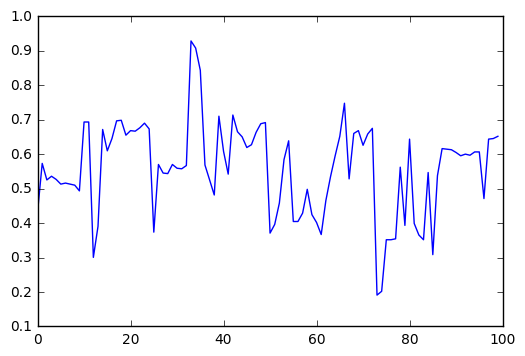

In [236]:
plot(ne[0:100])